<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout7_Predictions_CIs_PIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #7 : SLR - Predictions, Confidence Intervals, and Prediction Intervals


<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Find Cars Dataset

Consider the following data collected from the FindCars.com website.  Findcars provides information on cars for sale in our geographic region.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li><strong>Response Variable</strong>: Price ($)</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>CarType, e.g. car, pickup, suv, etc.</li>
          <li>Miles</li>
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=14154g-4S0k9eGsqD8xlEmGahpyX79dH2" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

FindCars.com: [Website](http://www.findcars.com)

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load dataset into COLAB

Load the tidyverse() package into the current COLAB session.

In [ ]:
#load tidyverse package
library(tidyverse)

Next, read the data in using read_csv() function.

In [ ]:
# Reading data in using read_csv 
FindCars <- read_csv("http://www.StatsClass.org/stat360/Datasets/FindCars.csv")

View the first few rows of the FindCars data.frame.

In [ ]:
#View the first few rows of data
head(FindCars)

## Obtain the Desired Subset of Data

The model will be fit to data that meet the following conditions.  A filter() can be used in subset the data.


*   CarType = Car
*   Car should have mileage between 25000 and 100000



In [5]:
#Using a fitler() to subset the desired data
FindCars_CarsOnly <- (FindCars
  %>% filter(CarType == "Car" & Miles > 25000 & Miles < 100000)
)

Before preceding, take a look at the FindCars_CarsOnly data.frame to ensure that the filtering was done correctly.

In [ ]:
head(FindCars_CarsOnly, n=20)

## Simple Linear Regression - Model Setup

Consider the following setup for the simple linear regression model.

<ul>
  <li><strong>Response Variable</strong>: Price</li>
  <li><strong>Independent / Predictor Variable</strong>: Mileage</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(Price | Miles) = \beta_{0} + \beta_{1} * Miles$</li>
  <li>$Var(Price | Miles) = \sigma^{2}$</li>
</ul></ul>

## Simple Linear Regression - Scatterplot

First, create a scatterplot and include simple linear regression line.

Warning message:
“Removed 26 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 26 rows containing missing values (geom_point).”


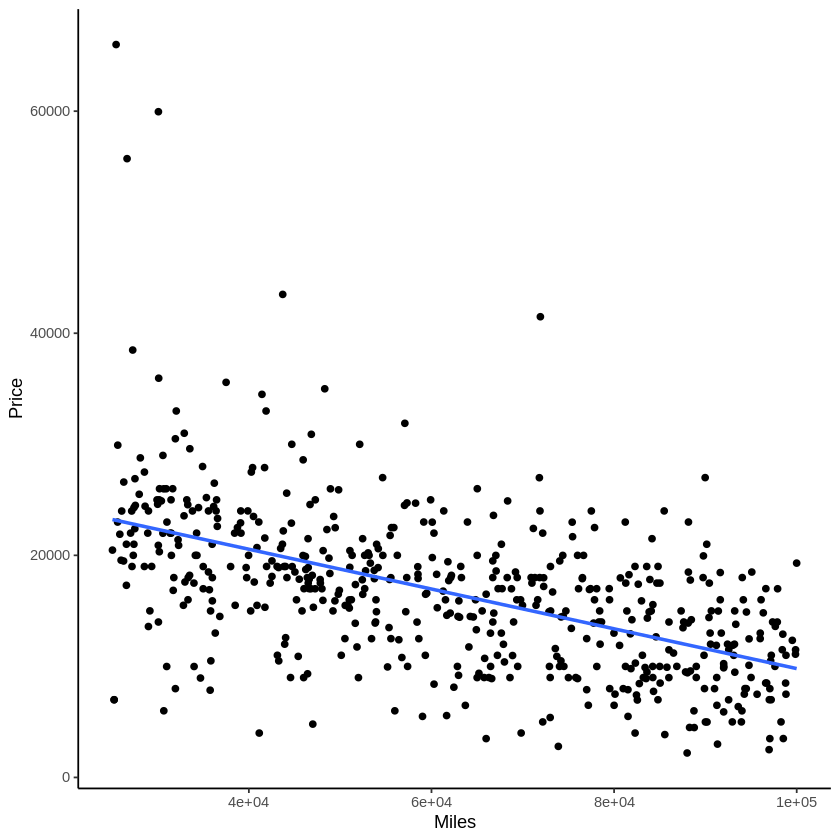

In [ ]:
#Scatterplot with simple linear regression line
ggplot(data=FindCars_CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions



1.   Describe the relationship between Price and Miles.

 - Form
 - Direction
 - Strength






2.   Does the propsed mean function seem appropriate?  Discuss.


3.   Does the variance in Price appear to change as a function of Miles? That is, does a constant variance function seem appropriate? Discuss.

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

## A Visual Inspection of the Mean Function

A visual inspection for your assumption regarding the mean function can be done.  If a robust smoother (e.g. loess smoother) is fairly linear, the a linear mean function is reasonable. 

In [ ]:
#Scatterplot with lm and loess smoother
ggplot(data=FindCars_CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +    
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) + #Add a SLR line
  geom_smooth(method='loess', formula = y ~ x, se=FALSE, col="darkgreen") +  #Add loess smoother 
  theme_classic()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions



4.   Here, the loess smoother and lm smoother are nearly identical.  What does this imply about the use of a linear mean function to model this data?  Briefly discuss.




<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

## Fitting the SLR Model

Now, let's fit the simple linear regression model to this data.

In [8]:
#Fitting the simple linear regression model
LinearModel_Price_Miles <- lm(Price ~ Miles, data=FindCars_CarsOnly)

Next, getting a summary of the model output.

In [12]:
#Getting a summary of the model
summary(LinearModel_Price_Miles)


Call:
lm(formula = Price ~ Miles, data = FindCars_CarsOnly)

Residuals:
   Min     1Q Median     3Q    Max 
-16348  -3592   -235   2950  42847 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.771e+04  7.996e+02   34.66   <2e-16 ***
Miles       -1.791e-01  1.216e-02  -14.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6247 on 540 degrees of freedom
  (26 observations deleted due to missingness)
Multiple R-squared:  0.2866,	Adjusted R-squared:  0.2853 
F-statistic:   217 on 1 and 540 DF,  p-value: < 2.2e-16


<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

Consider the estimated simple linear regression model.

$$\begin{array}{rcl}
\hat{E}(Price|Miles) & = & \hat{\beta}_{0} + \hat{\beta}_{1} * Miles \\
& = & 27710 -0.1791 * Miles\\
\end{array}
$$



5.    What is the interpretation of $\hat{\beta}_{1} = -\$0.1791$?

6.    What is the interpretation of $\hat{\beta}_{0} = \$27,710$?

7.  What is the interpretation of $R^2$? 

8.  What is the interpretation of the Root Mean Square Error = $RMSE$ (named Residual standard error by R)?

Consider the follwoing statistical hypothesis test done by R.

$$\begin{array}{rl}
H_{0}: & \beta_{1} = 0 \\
H_{A}: & \beta_{1} \ne 0 \\
\end{array}
$$

9.  What is the test statistic, p-value, decision, and conclusion from this test?

- Test Statistic:
- P-value:
- Decision:
- Conclusion:

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

## Confidence Intervals for Model Parameters

First, let's obtain the appropirate quantiles from a t-distribution with $df=(542-2)$.  A t-distribution with $df=540$ will have 95% of it's probability between $\pm 1.9644$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1PySieW0XFu43Wf_QypF0dq7ulT0O1nkF" width="50%" height="50%"></img>
<br><font size="-1">Source: https://homepage.divms.uiowa.edu/~mbognar/applets/t.html</font>
</p>



The appropriate quantiles can be obtained direclty in R using the qt() function.

In [ ]:
#Getting the 2.5% and 97.5% percentiles from t-distribution 
qt(c(0.025,0.975), df=540)

The 95% confidence interval for $\beta_{1}$ is given by the following quantities.  

$$
\begin{array}{rl}
Lower \space Endpoint: & & \hat{\beta}_{1} - \left( 1.9644 * Std \space Error(\hat{\beta}_{1})  \right) \\
& = &  -0.1791- \left( 1.9644 * 0.0122 \right) \\
& = &  -0.2030 \\
\end{array}
$$

Likewise for the upper endpoint, 

$$
\begin{array}{rl}
Upper \space Endpoint: & & \hat{\beta}_{1} + \left( 1.9971 * Std \space Error(\hat{\beta}_{1} \right) \\
& = &  -0.1791 + \left( 1.9644 * 0.0122 \right) \\
& = & -0.1552   \\
\end{array}
$$

The confidence interval for $\beta_{0}$ can be computed similarly.  The 95% confidence interval for $\beta_{0}$ and $\beta_{1}$ can be computed directly using the confit() function in R.  This is demostrated here.

In [ ]:
# CI for Model Parameters
confint(LMModel_Price_Miles)

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

10.    Provide an interpretation of the 95% CI for $\beta_{0}$:  

11.    Provide an interpretation of the 95% CI for $\beta_{1}$:

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

##  Getting the Quality of Fit Plots

First, let's create a data.frame that contains the predicted values and residuals for all data in our original dataset.

In [13]:
#Getting a data.frame that contains the predicted and residuals
(FindCars_CarsOnly
 %>% mutate(
            Predicted_Price = predict(LinearModel_Price_Miles, newdata = FindCars_CarsOnly),
            Residual = (Price - Predicted_Price)
           )
  %>% select(Description, Year, Make, Dealer, Location, Price, Miles, Predicted_Price, Residual)
 ) -> FindCars_CarsOnly_with_Predicted_and_Residuals

Next, getting a scatterplot of $Actual$ vs $Predicted$. 

In [ ]:
#Scatterplot actual of Actual vs Predicted
ggplot(data=FindCars_CarsOnly_with_Predicted_and_Residuals, aes(x=Predicted_Price, y=Price)) + 
  geom_point() +    #adding the points to the plot
  geom_abline(intercept = 0, slope = 1, col="darkgreen", size=1) +   # adding a y=x reference line
 # geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns
  
  # Deal with scaling the plot appropriately
  coord_fixed(ratio = 1) +    # Force the plot to be square, i.e. aspect ratio = 1
  xlim(0,60000) +            # Set the limits on the x-axis (should match the y-axis)
  ylim(0,60000) +            # Set the limits on the y-axis (should match the x-axis)
  
  ggtitle("Plot of Actual vs Predicted") +   #Add a title to the plot
  
  theme_bw()

Also, a scatterplot of $Residuals$ vs $Predicted$. 

In [ ]:
#Scatterplot with simple linear regression line
ggplot(data=FindCars_CarsOnly_with_Predicted_and_Residuals, aes(x=Predicted_Price, y=Residual)) + 
  geom_point() +    #adding the points to the plot
  geom_abline(intercept = 0, slope = 0, color="darkgreen", size=1) +   # adding a y=0 reference line
  geom_smooth(method='loess', formula = y ~ x, se=FALSE) +  #adding a loess smoother to identify patterns in Residuals
  
  # Make the y-axis symmetric about 0
  ylim(-40000,40000) + 

  ggtitle("Plot of Residuals vs Predicted") +   #Add a title to the plot
  
  theme_bw()

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

12.    What is learned from the $Actual$ vs $Predicted$ scatterplot? Discuss.

13.    What is learned from the $Residual$ vs $Predicted$ scatterplot? Discuss.

14.  Consider the following code.  What is this code doing?  Why might it be important to investigate these particular cars?  Discuss.

In [ ]:
(FindCars_CarsOnly_with_Predicted_and_Residuals
 %>% filter(Residual > 20000)
)

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

## Making a Prediction

Suppose the goal is to make a prediction for a car that has $Miles= 60000$.  

<p align='center'><font size="+1">Used Car with Miles = 600000</font><br><img src="https://drive.google.com/uc?export=view&id=1C9nfG_4DJ2nOYCPAlIcJWdEQW5MC3jwR" width="25%" height="25%"></img>
</p>

From the scatterplot that includes the estimated regression line, we can see that a car with $Miles=60000$ has an expected price near $\$17,000$.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=1w86YtGaGARz1jcmve2ufD7OIHh8Kz_OG" width="50%" height="50%"></img>
</p>

The estimated regression equation for the expected price of a car given Miles is given by the following equation.

$$\begin{array}{rcl}
\hat{E}(Price|Miles=60000) & = & 27710 - 0.1791 * Miles \\
& = & 27710 - 0.1791 * 60000 \\
& = & \$16,964 \\ 
& \approx & \$17,000
\end{array}
$$

In R, making a prediction for a new observation requires that one to create a new data.frame.  The new data.frame must contain a value for each of the predictor variables in the model.  

In [17]:
MyCar <- data.frame(Miles = c(60000))

<u>Note</u>:  The names used for the predictors in the new data.frame must match **exactly** the names used for the predictors in the model object.  


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1xUIvSPhJovx5lw45LME66WGzeBQCJObf" width="50%" height="50%"></img>
</p>

Next, the predict() function can be used to make the prediction.  The predict() function takes two arguments:


1.   The model object that will be used for the prediction
2.   A data.frame that contians values for which predictions will be made.



In [ ]:
predict(LinearModel_Price_Miles, newdata=MyCar)

## Variation in a Prediction

Suppose the goal is to predict the price of a car with $Miles = 60000$.  The variation in this prediction is due to two components:

- Variation in the estimated mean function, i.e. a different set of data will produce a slightly different mean function; hence a slightly different prediction
- Variation due to other factors not be considered, i.e. the fact that two different cars with the same mileage may not cost the same


<p align='center'><img src="https://drive.google.com/uc?export=view&id=1Iici4bRbqAD9yVRGKXP8MHrPm3a-sI8y" width="50%" height="50%"></img>
</p>

<table>
  <tr>
    <td align="center" valign="top"><font size="+1">Variation in Estimated Mean Function</font><br><img src="https://drive.google.com/uc?export=view&id=1jVd9ykv3sh3FCUXnbVJjseOc-GKyFHAU"></img>
    </td>
    <td align="center" valign="top"><font size="+1">Variation in Individual Cars</font><br><img src="https://drive.google.com/uc?export=view&id=168VzIE7An2ukkQtRd4_qDC9_uYFfGhgO"></img>
    </td>
  </tr>
</table>


Recall, the bootstrap procedure allows one to investigate the variation present in the coefficients of the estimated regression equation over repeated sampling.  Thus, the boostrap can help us understand the variation in the estiamted regression line over repeated sampling.

In [19]:
#@title Bootstrap - Repeated Slopes Graph
#######################################################
# Bootstrap Regression
# Note: bootstrapping residuals here
#######################################################

BootstrapSlopeGraph=function(slr_object,b=100,delay=0){

	y=slr_object$model[,1]
	x=slr_object$model[,2]
	resid=slr_object$residuals

	plot(x,y,type="n", xlab="Miles",ylab="Price", xaxt="n", yaxt="n")
	abline(slr_object)
  xmarks <-c(40000,60000,80000,100000)
  ymarks <-c(0,10000,20000,30000,40000,50000,60000)
  axis(1,at=xmarks,labels=format(xmarks,scientific=FALSE))
  axis(2,at=ymarks,labels=format(ymarks,scientific=FALSE))

	for(i in 1:b){
		residstar = sample(resid,replace=F)
		ystar=y+residstar
		lmtemp = lm(ystar~x)
		abline(lmtemp,col="grey")
	}
}


Next, the BoostrapSlopeGraph() function will be used to obtain a total of 1000 repeated regression lines.

In [ ]:
BootstrapSlopeGraph(LinearModel_Price_Miles, b=1000)

It can be shown that for a simple linear regression model, the estimated regression line must pass through the point $(\bar{x}, \bar{y})$.  An side-effect of this condition is that there is less variability in the estimated regression line near the average x value and more variability in the estimated regression line away from the average x value.

<p align='center'><img src="https://drive.google.com/uc?export=view&id=13jctVF1gG06-d7_QIz6yMP1uD8dehdBD" width="50%" height="50%"></img>
</p>

The following provides a list of equations for the variation in a mean, variation in a mean that is estimated from a SLR line, and the variation in an individual prediction that is obtained from an estimated regression line.

- Variation in $\hat{E}(Price)$
  $$ \sqrt{\hat{\sigma}^{2} \left( \frac{1}{n} \right)}
  $$

- Variation in $\hat{E}(Price | Miles)$
  $$ \sqrt{\hat{\sigma}^{2} \left( \frac{1}{n} + \frac{(x_{pred} - \bar{x})^2}{\sum(x_i - \bar{x})^2}\right)}
  $$

- Variation in $Price|Miles$
  $$ \sqrt{\hat{\sigma}^{2} \left( \frac{1}{n} + \frac{(x_{pred} - \bar{x})^2}{\sum(x_i - \bar{x})^2}\right) + \hat{\sigma}^2}
  $$

## The 95% Confidence Interval for a Prediction

The following specification of the predict() function will compute a 95% Confidence Interval for an *average* prediction.

In [ ]:
predict(LinearModel_Price_Miles, newdata=MyCar, interval = "confid", se=TRUE)

The $se.fit$ value from the predict() output is the standard error of the estimated regression line for $Miles=60000$.

$$ \sqrt{\hat{\sigma}^{2} \left( \frac{1}{n} + \frac{(x_{pred} - \bar{x})^2}{\sum(x_i - \bar{x})^2}\right)} = 269.38
$$

The following summaries for Miles allow one to compute $(x_{pred}-\bar{x})^2$ and $\sum(x_i - \bar{x})^2$ when computing $se.fit$.

In [ ]:
(FindCars_CarsOnly
  %>% summarize(
                  Mean_Miles = mean(Miles),
                  Variance_Miles = var(Miles),
                  Count = n()
               )
)

The 95% confidence interval for $E(Price|Miles=60000) $ is given by the following quantities.  The value $1.96644$ is the appropriate t-quantile from a t-distribution with $df=540$. 

$$
\begin{array}{rl}
Lower \space Endpoint: & & \hat{E}(Price|Miles=60000) - \left( 1.9644 * Std \space Error  \right) \\
& = &  16964.23- \left( 1.9644 * 269.38 \right) \\
& = &  16435.07 \\
\end{array}
$$

Likewise for the upper endpoint, 

$$
\begin{array}{rl}
Upper \space Endpoint: & & \hat{E}(Price|Miles=60000) + \left( 1.9644 * Std \space Error  \right) \\
& = &  16964.23 + \left( 1.9644 * 269.38 \right) \\
& = &  17493.39 \\
\end{array}
$$


Again, a 95% Confidence Interval is for an **average**.  That is, what is the expected average price for a collection of used cars all with $Miles=60000$.

<p align='center'><font size="+1">Several Used Car with Miles = 600000</font><br><img src="https://drive.google.com/uc?export=view&id=1gyw84-ptqDP6L0zxQK01h1k6UjSCQD7O" width="25%" height="25%"></img>
</p>

## The 95% Prediction Interval for a Prediction

The following specification of the predict() function will compute a 95% Prediction Interval for an *individual* prediction.

In [ ]:
predict(LinearModel_Price_Miles, newdata=MyCar, interval = "predict", se=TRUE)


$$ \begin{array}{rcl}
\sqrt{\hat{\sigma}^{2} \left( \frac{1}{n} + \frac{(x_{pred} - \bar{x})^2}{\sum(x_i - \bar{x})^2}\right) + \hat{\sigma}^2} & = & \sqrt{269.38^2 + 6247.28^2}\\
& = & \sqrt{39101073} \\ 
& = & 6253 \\ 
\end{array} 
$$

The 95% Prediction Interval for $E(Price|Miles=60000) $ is given by the following quantities.  

$$
\begin{array}{rl}
Lower \space Endpoint: & & \hat{E}(Price|Miles=60000) - \left( 1.9644 * Std \space Error  \right) \\
& = &  16964.23- \left( 1.9644 * 6253 \right) \\
& = &  4681\\
\end{array}
$$

Likewise for the upper endpoint, 

$$
\begin{array}{rl}
Upper \space Endpoint: & & \hat{E}(Price|Miles=60000) + \left( 1.9644 * Std \space Error  \right) \\
& = &  16964.23 + \left( 1.9644 * 6253 \right) \\
& = &  29248 \\
\end{array}
$$


Again, a 95% Prediction Interval is for the average of an **individual** car.  That is, what is the average price for a single used car with $Miles=60000$.

<p align='center'><font size="+1">Used Car with Miles = 600000</font><br><img src="https://drive.google.com/uc?export=view&id=1C9nfG_4DJ2nOYCPAlIcJWdEQW5MC3jwR" width="25%" height="25%"></img>
</p>


## Final Thoughts

In practice, there tends to be confusion between 95% confidence intervals and 95% prediction intervals.

1.  Prediction intervals are *always* wider than confidence intervals.
2.  Prediction intervals are often too wide to be useful in practice.
3.  Many do *not* understand the difference between a prediction interval and confidence interval for a prediction.  This tends to lead to confusion/abuse in practice, i.e. people report confidence interval limits, but interpret them as prediction intervals.


4.  In ggplot, setting se=TRUE in the geom_smooth() function produces the 95% confidence interval for all predicted values.


In [ ]:
#Scatterplot with specification of se=TRUE
ggplot(data=FindCars_CarsOnly, aes(x=Miles,y=Price)) + 
  geom_point() +    
  geom_smooth(method='lm', formula = y ~ x, se=TRUE) +  
  theme_classic()

## Getting the 95% Confidence Interval and 95% Prediction Interval Bands

The following code will add the 95% CIs and 95% PIs to the original data.frame.  This is needed in order to plot the bands with ggplot.

In [ ]:
#Getting the 95% Confidence Intervals and Prediction Intervals via predict()

#Use predict() and mutate to obtain the 95% CIs and 95% PIs
(FindCars_CarsOnly
  %>% mutate(Price_CI = predict(LinearModel_Price_Miles, newdata=FindCars_CarsOnly, interval="confid"))
  %>% mutate(Price_PI = predict(LinearModel_Price_Miles, newdata=FindCars_CarsOnly, interval="predict"))
  %>% select(Description, Year, Make, Dealer, Location, Price, Miles, Price_CI, Price_PI)
) -> FindCars_CarsOnly_with_CI_and_PI

cat("\n\n The 95% CI and 95% PIs have been added to the data.frame:\n\n")
head(FindCars_CarsOnly_with_CI_and_PI)

#Next, pull apart the columns that include the CIs and PIs
(FindCars_CarsOnly_with_CI_and_PI
   %>% rowwise()
   %>% mutate(
               Price_Predicted = Price_CI[1],
               Price_LowerCI= Price_CI[2],
               Price_UpperCI= Price_CI[3],
               Price_LowerPI= Price_PI[2],
               Price_UpperPI= Price_PI[3],
             )
 ) -> FindCars_CarsOnly_with_CI_and_PI_SplitApart

cat("\n\n The 95% CI and 95% PIs now are aplit apart:\n\n")
head(FindCars_CarsOnly_with_CI_and_PI_SplitApart)

Next, ggplot will be used to plot the 95% CI and 95% PI bands.

In [ ]:
#Scatterplot with 95% Confidence Interval and 95% Prediction Interval bands
ggplot(data=FindCars_CarsOnly_with_CI_and_PI_SplitApart, aes(x=Miles,y=Price)) + 
  geom_point(alpha = 0.1) +    
  geom_line(aes(x=Miles,y=Price_Predicted), col="black") +
  geom_line(aes(x=Miles,y=Price_LowerCI), linetype = "dashed", col="black") +
  geom_line(aes(x=Miles,y=Price_UpperCI), linetype = "dashed", col="black") +
  geom_line(aes(x=Miles,y=Price_LowerPI), linetype = "longdash", col="red") +
  geom_line(aes(x=Miles,y=Price_UpperPI), linetype = "longdash", col="red") +
  theme_classic()


## Outlier Detection

The following snipit of code can be used for outlier detection.

In [ ]:
#Identify the outliers on the low/high side 
(FindCars_CarsOnly_with_CI_and_PI_SplitApart
    %>% mutate(Outlier = case_when(
                                   Price < Price_LowerPI ~ "Yes, much lower than expected",
                                   Price > Price_UpperPI ~ "Yes, much higher than expected",
                                   TRUE ~ "No"
                                  )
              )
) -> Outliers

(Outliers
  %>% select(Description, Year, Make, Price, Miles, Price_Predicted, Dealer, Location, Outlier)
  %>% filter(str_detect(Outlier, "Yes"))  # str_detect looks for keyword in a string
  %>% arrange(Outlier)  # used to sort a data.frame by a particular column
)


Next, let's recreate the scatterplot with the 95% CI and PI bands with color coding the outliers.

In [ ]:
#Scatterplot with 95% Confidence Interval and 95% Prediction Interval bands
ggplot(data=Outliers, aes(x=Miles,y=Price, col=Outlier)) + 
  geom_point() +    
  scale_color_manual(values=c("lightgray", "red", "darkgreen")) + 
  geom_line(aes(x=Miles,y=Price_Predicted), col="black") +
  geom_line(aes(x=Miles,y=Price_LowerCI), linetype = "dashed", col="black") +
  geom_line(aes(x=Miles,y=Price_UpperCI), linetype = "dashed", col="black") +
  geom_line(aes(x=Miles,y=Price_LowerPI), linetype = "longdash", col="red") +
  geom_line(aes(x=Miles,y=Price_UpperPI), linetype = "longdash", col="red") +
  theme_classic()

Finally, reduce the list of outliers to only include those that fall below the 95% Prediction Interval band.

In [ ]:
(Outliers
  %>% select(Description, Year, Make, Price, Miles, Price_Predicted, Dealer, Location, Outlier)
  %>% filter(str_detect(Outlier, "lower"))  # str_detect looks for keyword in a string
  %>% arrange(Outlier)  # used to sort a data.frame by a particular column
)



---



---


End of Document